## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split

In [19]:
# 讀取鳶boston資料集
boston = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeRegressor(max_depth=10,min_samples_split=10,max_features='sqrt')

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

In [20]:
from sklearn.metrics import mean_squared_error
acc = mean_squared_error(y_test, y_pred)
print("MSE: ", acc)

MSE:  14.687423158793589


In [22]:
print(boston.feature_names)
print("Feature importance: ", clf.feature_importances_)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Feature importance:  [6.56764450e-02 4.89751944e-04 9.37204516e-03 4.16719235e-04
 1.06791857e-02 1.67044548e-01 5.36204321e-03 1.58954378e-02
 1.52956908e-03 2.93238132e-02 8.16745172e-03 2.36469280e-03
 6.83678297e-01]


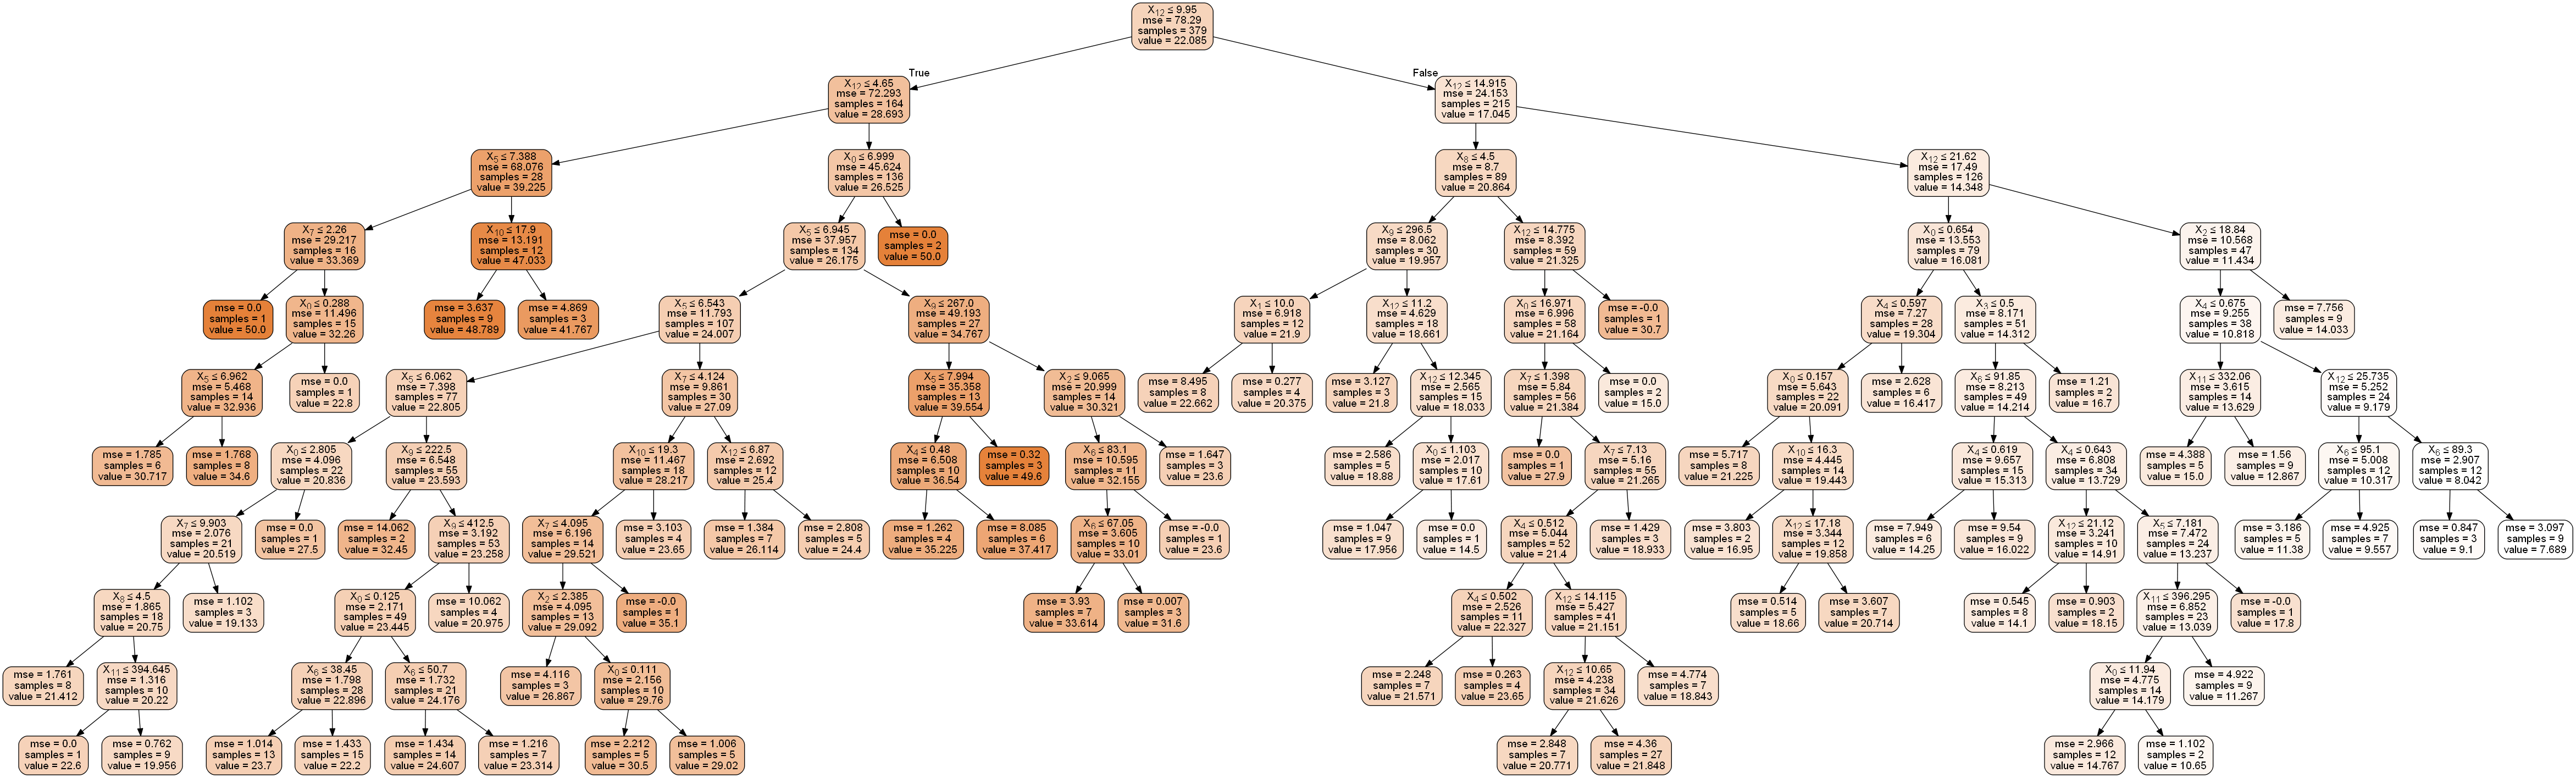

In [21]:
import os
os.environ['PATH'] = os.environ['PATH'] + (';C:\\Anaconda3\\Library\\bin\\graphviz')
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())